In [17]:
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from pymongo import MongoClient
import pprint

import pandas as pd

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time

chrome_driver_path = "/Users/annebarry/galvanize/running_rivalries/chromedriver"

driver = webdriver.Chrome(executable_path = chrome_driver_path)


driver.get('https://results.nyrr.org/event/M2019/finishers#g=F&page=1&af=25&at=29')

'<html data-ng-app="RmsApp" ng-controller="layoutController" class="ng-scope"><head><script type="text/javascript" id="www-widgetapi-script" src="https://s.ytimg.com/yts/jsbin/www-widgetapi-vflO72c_S/www-widgetapi.js" async=""></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/ec.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/linkid.js"></script><script src="//www.youtube.com/iframe_api" async=""></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f15ea495949e94d&amp;bkl=0&amp;bl=1&amp;pdt=350&amp;sid=5f15ea495949e94d&amp;pub=ra-5983936da604f90b&amp;rev=v8.28.7-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=results.nyrr.org&amp;fp=event%2FM2019%2Ffinishers&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&
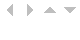

In [26]:
data = driver.page_source
data

In [28]:
soup = BeautifulSoup(data, 'html.parser')

<html class="ng-scope" data-ng-app="RmsApp" ng-controller="layoutController">
 <head>
  <script async="" id="www-widgetapi-script" src="https://s.ytimg.com/yts/jsbin/www-widgetapi-vflO72c_S/www-widgetapi.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">
  </script>
  <script async="" src="//www.youtube.com/iframe_api">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5f15ea495949e94d&amp;bkl=0&amp;bl=1&amp;pdt=350&amp;sid=5f15ea495949e94d&amp;pub=ra-5983936da604f90b&amp;rev=v8.28.7-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=results.nyrr.org&amp;fp=event%2FM2019%2Ffinishers&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0
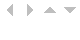

In [29]:
print(soup.prettify())

In [32]:
winner = soup.findAll("div", 'rms-grid-item')[0]
print(winner)

<div class="row rms-grid-item" ng-class="{ 'narrow' : layoutScope.isGridRowNarrow &amp;&amp; layoutScope.isDesktopView }" ng-click="openRunnerResults(eventCode, eventFinisher.bib)">
<div class="col-xs-4 col-sm-4 col-md-6 h-100" style="padding-right: 0;">
<div class="name rms-grid-line ng-binding">
                                Joyciline Jepkosgei
                            </div>
<div class="details rms-grid-line">
<!-- ngIf: eventFinisher.gender || eventFinisher.age --><span class="ng-binding ng-scope" ng-if="eventFinisher.gender || eventFinisher.age">F25</span><!-- end ngIf: eventFinisher.gender || eventFinisher.age -->
<!-- ngIf: eventFinisher.city && eventFinisher.showUsa -->
<!-- ngIf: eventFinisher.stateProvince && eventFinisher.showUsa -->
<!-- ngIf: eventFinisher.countryCode && !eventFinisher.iaaf -->
<!-- ngIf: eventFinisher.iaaf --><span class="ng-binding ng-scope" ng-if="eventFinisher.iaaf">KEN</span><!-- end ngIf: eventFinisher.iaaf -->
<!-- ngIf: eventFinisher.bib --><s

In [44]:
winner.findAll("span", "long-text")[0].text[4:]

age = []
time = []
name = []

for i, result in enumerate(soup.findAll("div",'rms-grid-item')):
    time.append(result.findAll("span", "long-text")[0].text[4:])
    age.append(int(result.findAll("span", "ng-binding ng-scope")[0].text[1:]))
    
    
print(time)
print(age)

['2:22:38', '2:25:51', '2:27:48', '2:31:55', '2:47:52', '2:51:41', '2:51:55', '2:52:05', '2:52:34', '2:52:42', '2:52:47', '2:53:27', '2:54:16', '2:55:56', '2:56:01', '2:56:25', '2:56:26', '2:57:00', '2:57:17', '2:57:20', '2:57:25', '2:57:49', '2:58:11', '2:58:17', '2:58:27', '2:58:51', '2:58:58', '2:59:19', '2:59:42', '3:00:10', '3:00:25', '3:01:15', '3:01:29', '3:01:30', '3:01:43', '3:02:56', '3:03:11', '3:04:33', '3:04:39', '3:04:41', '3:05:07', '3:05:33', '3:05:36', '3:05:58', '3:06:03', '3:06:03', '3:06:09', '3:06:20', '3:06:42', '3:08:27', '3:08:29']
[25, 25, 29, 27, 26, 29, 25, 28, 28, 25, 25, 28, 27, 28, 29, 27, 27, 28, 29, 26, 25, 29, 26, 26, 29, 27, 25, 29, 27, 27, 26, 27, 28, 27, 26, 27, 25, 28, 29, 26, 26, 28, 29, 26, 29, 29, 28, 26, 29, 29, 28]
